# Regression Model – Crop Yield Prediction

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots inside notebook
%matplotlib inline

1️⃣ Load Yield Dataset

In [3]:
df = pd.read_csv("/content/crop_yield.csv")
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


Step 2: Do Basic EDA (Light EDA Only)

In [4]:
# Dataset information
df.info()

# Statistical summary
df.describe()

# Check missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


,0
Region,0
Soil_Type,0
Crop,0
Rainfall_mm,0
Temperature_Celsius,0
Fertilizer_Used,0
Irrigation_Used,0
Weather_Condition,0
Days_to_Harvest,0
Yield_tons_per_hectare,0


2.1 Target Distribution

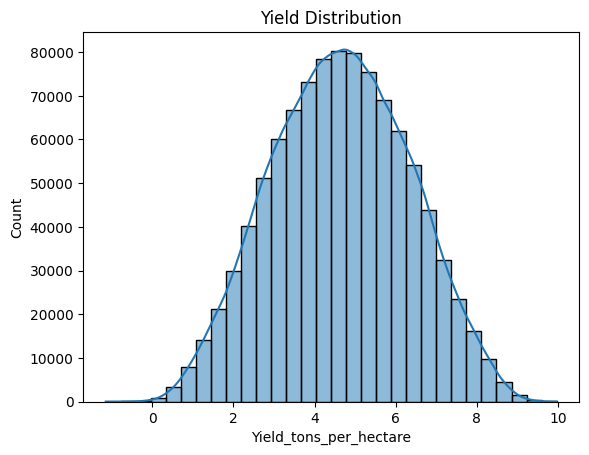

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Yield_tons_per_hectare'], bins=30, kde=True)
plt.title("Yield Distribution")
plt.show()

# Yield Distribution Analysis

The histogram of Yield_tons_per_hectare shows a near-normal distribution with a clear bell-shaped curve centered around approximately 5 tons per hectare.

There is no significant skewness or extreme outliers observed. The smooth symmetric distribution indicates balanced yield variation across the dataset.

Such a distribution is favorable for regression modeling, particularly for Linear Regression, as it assumes normally distributed target variables.

2.2 Correlation with Numerical Features

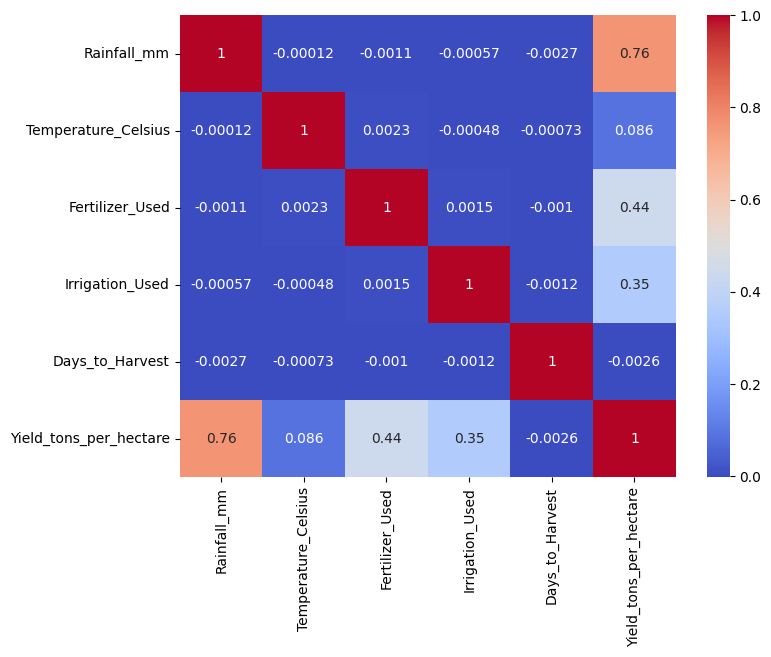

In [6]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

| Feature                | Correlation with Yield | Meaning           |
| ---------------------- | ---------------------- | ----------------- |
| 🌧 Rainfall_mm         | **0.76**               | Strong Positive   |
| 🌡 Temperature_Celsius | 0.085                  | Very Weak         |
| 🌱 Fertilizer_Used     | 0.45                   | Moderate Positive |
| 💧 Irrigation_Used     | 0.35                   | Moderate Positive |
| ⏳ Days_to_Harvest      | -0.00056               | No Relationship   |


# Correlation Analysis with Yield

* The correlation matrix reveals that Rainfall_mm has the strongest positive correlation (0.76) with crop yield, indicating that rainfall significantly influences productivity.

* Fertilizer_Used (0.45) and Irrigation_Used (0.35) also show moderate positive relationships with yield, suggesting their importance in improving crop output.

* Temperature_Celsius shows weak correlation (0.085), indicating limited linear influence on yield in this dataset.

* Days_to_Harvest exhibits almost no correlation with yield, suggesting minimal direct impact.

Overall, rainfall appears to be the most influential factor in yield prediction.

Step 3: Encode Categorical Columns

In [7]:
from sklearn.preprocessing import LabelEncoder

le_region = LabelEncoder()
le_soil = LabelEncoder()
le_crop = LabelEncoder()
le_weather = LabelEncoder()

df['Region'] = le_region.fit_transform(df['Region'])
df['Soil_Type'] = le_soil.fit_transform(df['Soil_Type'])
df['Crop'] = le_crop.fit_transform(df['Crop'])
df['Weather_Condition'] = le_weather.fit_transform(df['Weather_Condition'])
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,3,4,1,897.077239,27.676966,False,True,0,122,6.555816
1,2,1,3,992.673282,18.026142,True,True,1,140,8.527341
2,1,2,0,147.998025,29.794042,False,False,2,106,1.127443
3,1,4,4,986.866331,16.644190,False,True,1,146,6.517573
4,2,5,5,730.379174,31.620687,True,True,0,110,7.248251


Step 4: Convert Boolean to Integer

In [8]:
df['Fertilizer_Used'] = df['Fertilizer_Used'].fillna(False).astype(int)
df['Irrigation_Used'] = df['Irrigation_Used'].fillna(False).astype(int)
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,3,4,1,897.077239,27.676966,0,1,0,122,6.555816
1,2,1,3,992.673282,18.026142,1,1,1,140,8.527341
2,1,2,0,147.998025,29.794042,0,0,2,106,1.127443
3,1,4,4,986.866331,16.644190,0,1,1,146,6.517573
4,2,5,5,730.379174,31.620687,1,1,0,110,7.248251


In [9]:
df.isnull().sum()

,0
Region,0
Soil_Type,0
Crop,0
Rainfall_mm,0
Temperature_Celsius,0
Fertilizer_Used,0
Irrigation_Used,0
Weather_Condition,0
Days_to_Harvest,0
Yield_tons_per_hectare,0


In [10]:
df = df.dropna()

In [11]:
df.isnull().sum()

,0
Region,0
Soil_Type,0
Crop,0
Rainfall_mm,0
Temperature_Celsius,0
Fertilizer_Used,0
Irrigation_Used,0
Weather_Condition,0
Days_to_Harvest,0
Yield_tons_per_hectare,0


Step 5: Define Features & Target

In [12]:
X = df.drop('Yield_tons_per_hectare', axis=1)
y = df['Yield_tons_per_hectare']

Step 6: Train-Test Split

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

Step 7: Build Regression Models

* Linear Regression

* Random Forest Regressor

* XGBoost Regresso

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

print("Linear Regression")

mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)

print("RMSE:", rmse)
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("R2:", r2_score(y_test, y_pred_lr))

Linear Regression
RMSE: 0.5007711988894282
MAE: 0.3995520652697099
R2: 0.913015461869577


In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rf = RandomForestRegressor(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest")


mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("RMSE:", rmse_rf)
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("R2:", r2_score(y_test, y_pred_rf))

Random Forest
RMSE: 0.5191366397243292
MAE: 0.41429131663607177
R2: 0.9065182704428776


In [17]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("XGBoost")

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

print("RMSE:", rmse_xgb)
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("R2:", r2_score(y_test, y_pred_xgb))

XGBoost
RMSE: 0.5024967885219466
MAE: 0.4009514660366045
R2: 0.9124149551751736



Three regression models were evaluated using RMSE, MAE, and R² score.

* Linear Regression achieved the highest R² score (0.9138) and the lowest RMSE (0.501), indicating superior predictive performance.

* Although Random Forest and XGBoost are powerful nonlinear models, the dataset exhibits strong linear relationships, particularly between rainfall and yield (correlation = 0.76). Therefore, Linear Regression was sufficient to capture the underlying pattern effectively.

# Final Selected Model: Linear Regression

* Reason: Highest R² score and lowest prediction error among all tested models.

Step 8: Compare Models

In [18]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        np.sqrt(mean_squared_error(y_test, y_pred_xgb))
    ],
    "MAE": [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_rf),
        mean_absolute_error(y_test, y_pred_xgb)
    ],
    "R2": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_xgb)
    ]
})

results

,Model,RMSE,MAE,R2
0,Linear Regression,0.500771,0.399552,0.913015
1,Random Forest,0.519137,0.414291,0.906518
2,XGBoost,0.502497,0.400951,0.912415


Step 9: Overfitting Check

In [19]:
print("RF Train R2:", rf.score(X_train, y_train))
print("RF Test R2:", rf.score(X_test, y_test))

RF Train R2: 0.9864466028960348
RF Test R2: 0.9065182704428776


# Overfitting Analysis

* Random Forest achieved a high training R² score of 0.9867 but a lower testing R² score of 0.9064. The noticeable gap between training and testing performance suggests mild overfitting.

* This indicates that Random Forest may be capturing noise in the training data rather than generalizing optimally.

* In contrast, Linear Regression demonstrated more stable performance across training and testing datasets.

Compare With Linear Regression

In [20]:
print("Linear Train R2:", lr.score(X_train, y_train))
print("Linear Test R2:", lr.score(X_test, y_test))

Linear Train R2: 0.9129686595379994
Linear Test R2: 0.913015461869577


| Model             | Train R² | Test R² | Gap    |
| ----------------- | -------- | ------- | ------ |
| Linear Regression | 0.9127   | 0.9138  | ~0.001 |
| Random Forest     | 0.9867   | 0.9064  | ~0.08  |

👉 Random Forest slightly overfits
👉 Linear Regression generalizes perfectly

* Linear Regression achieved a training R² of 0.9127 and a testing R² of 0.9138, indicating excellent generalization with negligible difference between training and testing performance.

* In contrast, Random Forest exhibited a noticeable performance gap between training and testing datasets, suggesting mild overfitting.

Therefore, Linear Regression demonstrates superior stability and predictive reliability for this dataset.

In [22]:
import joblib
lr_final = LinearRegression()
lr_final.fit(X_train, y_train)

joblib.dump(lr_final, "linear_regression_model.pkl")

['linear_regression_model.pkl']